# 5. VGG16 (Pre-trained CNN model as a Feature Extractor)

https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

In [1]:
from keras.applications import vgg16
from keras.models import Model
import keras
import os,shutil,math,scipy,cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
import pandas as pd

Using TensorFlow backend.


In [2]:
def redo_kreas_category(arr):
    redo=[]
    for i in arr:
        redo.append(list(i).index(1))
    return redo

- Get the data

In [3]:
lists=pd.read_csv('categories.csv')
lists=list(lists['0'])
len(lists)

60

In [4]:
true_labels = []
imgsize=100
#result_array = np.zeros((20580, imgsize, imgsize, 3))
result_array = np.zeros((11386, imgsize, imgsize, 3))
cur_dir = os.path.dirname(os.path.realpath(os.getcwd()))
paths=cur_dir+'/Project/Images/'
# we have 20580 images


j=0
for i in lists:
    images=os.listdir(paths+i)
    label=i[10:]
    for k in images:
        img = cv2.imread(paths+i+'/'+k,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        true_labels.append(label)
        result_array[j,:,:,:]=np.array(img)
        j=j+1

In [5]:
result_array.shape

(11386, 100, 100, 3)

- Scale the image

In [6]:
resultarray_scaled = result_array.astype('float32')
resultarray_scaled = resultarray_scaled/255

- Train test split & encode y labels

In [7]:
le = LabelEncoder()
le.fit(true_labels)
all_labels_enc = le.transform(true_labels)
all_labels_enc = to_categorical(all_labels_enc,len(np.array(np.unique(true_labels))))

print(true_labels[0:10], all_labels_enc[0:10])

['Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog', 'Maltese_dog'] [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0

In [8]:
X = resultarray_scaled

X_train, X_test, y_train, y_test = train_test_split(X,all_labels_enc,test_size=0.2,random_state=69)
X_train, X_val, y_train, y_val  = train_test_split(X_train,y_train,test_size=0.2,random_state=69)

- Let’s leverage Keras, load up the VGG-16 model, and freeze the convolution blocks so that we can use it as just an image feature extractor.

In [9]:
input_shape = (imgsize, imgsize, 3)

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

print(vgg.summary())

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_____

- modify the vgg

In [10]:
# take last block5_pool and flatten it 
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

In [11]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [12]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f715c21ab38>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f710360a4e0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f710360a208>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f70607bf9b0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f70607bf358>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f7060777780>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f70607147f0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f7060714748>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f70606c3898>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f70606e4978>,block3_conv3,False


All the layers of the VGG-16 model are frozen, which is good, because we don’t want their weights to change during model training. The last activation feature map in the VGG-16 model (output from block5_pool) gives us the bottleneck features, which can then be flattened and fed to a fully connected deep neural network classifier. 

We are going to extract all of the features from our training and validation datasets and then feed them as inputs to the classifier. 

- Get Features

In [13]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, X_train)
validation_features_vgg = get_bottleneck_features(vgg_model, X_val)
test_features_vgg = get_bottleneck_features(vgg_model, X_test)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape,
    '\tTest Bottleneck Features:',test_features_vgg.shape)

Train Bottleneck Features: (7286, 4608) 	Validation Bottleneck Features: (1822, 4608) 	Test Bottleneck Features: (2278, 4608)


- Built the model

In [14]:
input_shape = vgg_model.output_shape[1]
input_shape

4608

In [15]:
batch_size = 30 #number of images passed to the operation in every iteration
num_classes = len(np.array(np.unique(true_labels))) # target class
epochs = 30  #30 #number of times the entire dataset has gone through the neural network

In [16]:
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.array(np.unique(true_labels))), activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                30780     
Total params: 2,653,244
Trainable params: 2,653,244
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x=train_features_vgg, y=y_train,
                    validation_data=(validation_features_vgg, y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 7286 samples, validate on 1822 samples
Epoch 1/30
7286/7286 [==============================] - 6s 854us/step - loss: 4.0573 - acc: 0.0382 - val_loss: 3.8491 - val_acc: 0.0944
Epoch 2/30
7286/7286 [==============================] - 6s 805us/step - loss: 3.7224 - acc: 0.0973 - val_loss: 3.4966 - val_acc: 0.1636
Epoch 3/30
7286/7286 [==============================] - 6s 805us/step - loss: 3.4040 - acc: 0.1577 - val_loss: 3.2365 - val_acc: 0.2097
Epoch 4/30
7286/7286 [==============================] - 6s 799us/step - loss: 3.1316 - acc: 0.2088 - val_loss: 3.0401 - val_acc: 0.2316
Epoch 5/30
7286/7286 [==============================] - 6s 797us/step - loss: 2.9199 - acc: 0.2446 - val_loss: 2.8974 - val_acc: 0.2634
Epoch 6/30
7286/7286 [==============================] - 6s 810us/step - loss: 2.7069 - acc: 0.2989 - val_loss: 2.7957 - val_acc: 0.2761
Epoch 7/30
7286/7286 [==============================] - 6s 812us/step - loss: 2.5554 - a

- See accuracy in test dataset & double check other accuracies

In [18]:
# test
#train_features_vgg = get_bottleneck_features(vgg_model, X_train)
#validation_features_vgg = get_bottleneck_features(vgg_model, X_val)
#test_features_vgg = get_bottleneck_features(vgg_model, X_test)

y_test_model = model.predict_classes(test_features_vgg)
y_test_model_prob=model.predict_proba(test_features_vgg)
print(y_test_model_prob.shape)
y_test_true_flat=redo_kreas_category(y_test)
print(np.unique(y_test_model))
print(accuracy_score(y_test_model, y_test_true_flat))

(2278, 60)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
0.3270412642669008


In [19]:
# validation
y_val_model = model.predict_classes(validation_features_vgg)
y_val_model_prob=model.predict_proba(validation_features_vgg)
print(y_val_model_prob.shape)
y_val_true_flat=redo_kreas_category(y_val)
print(np.unique(y_val_model))
print(accuracy_score(y_val_model, y_val_true_flat))

(1822, 60)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
0.3221734357848518


In [20]:
# train
y_train_model = model.predict_classes(train_features_vgg)
y_train_model_prob=model.predict_proba(train_features_vgg)
print(y_train_model_prob.shape)
y_train_true_flat=redo_kreas_category(y_train)
print(np.unique(y_train_model))
print(accuracy_score(y_train_model, y_train_true_flat))

(7286, 60)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
0.9876475432335987


- Graphs

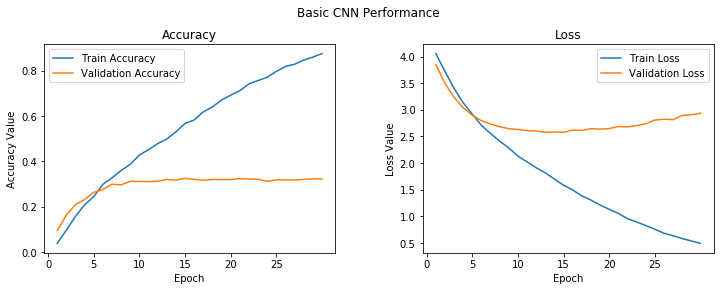

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,len(history.history['acc'])+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Overfitting?